### Lung images are divided into two groups according to the vessels-lung ratio
vol_05 is one class, the remaining is the other class

### Ratio displayed in histogram and scatter plot
ratio = vessel volume / lung volume

lung volume = Lung CT spacings * Sum of voxels that are designated as the lung by the seed filling

vessel volume = Lung CT spacings * Sum of voxels that are designated as the vessels. (voxel value greater than -500 in the segmented lung)

In [26]:
import pandas as pd
import numpy as np
volume = pd.read_csv('lung_vessel_volume.csv', index_col=0)
volume # volume in ml

,CT_id,lung_volume,vessle_volume,vessel_lung_ratio
0,vol_01.nii.gz,475.129,25.305,0.05326
0,vol_02.nii.gz,566.587,18.505,0.03266
0,vol_03.nii.gz,410.524,19.918,0.04852
0,vol_04.nii.gz,633.957,34.598,0.05457
0,vol_05.nii.gz,532.907,66.767,0.12529
0,vol_06.nii.gz,353.860,13.667,0.03862
0,vol_07.nii.gz,449.438,16.076,0.03577
0,vol_08.nii.gz,791.900,31.644,0.03996
0,vol_09.nii.gz,816.784,27.026,0.03309


min ratio: 0.03266 max ratio: 0.12529 mean ratio:  0.05130444444444445


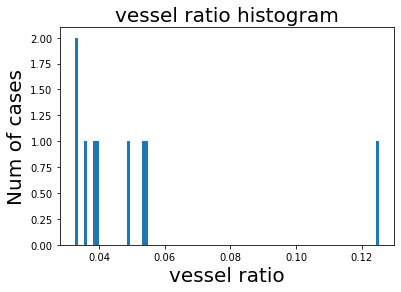

In [27]:
import matplotlib.pyplot as plt
ratio = volume['vessel_lung_ratio']
print('min ratio:',np.min(ratio),'max ratio:',np.max(ratio),'mean ratio: ',np.mean(ratio))
plt.title('vessel ratio histogram', fontsize = 20)
plt.xlabel('vessel ratio', fontsize = 20)
plt.ylabel('Num of cases', fontsize = 20)
plt.hist(np.array(ratio), bins=100)
plt.show()


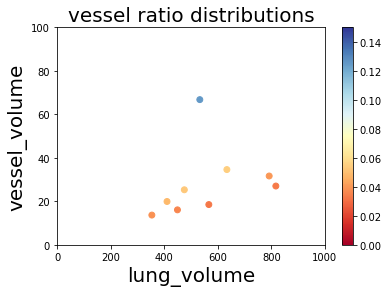

In [28]:
import matplotlib.pyplot as plt
cm = plt.cm.get_cmap('RdYlBu')
plt.xlim(xmax=1000,xmin=0)
plt.ylim(ymax=100,ymin=0)

plt.title('vessel ratio distributions', fontsize = 20)
plt.xlabel('lung_volume', fontsize = 20)
plt.ylabel('vessel_volume', fontsize = 20)
sc = plt.scatter(volume['lung_volume'], volume['vessle_volume'],
                 c=volume['vessel_lung_ratio'], vmin=0, vmax=0.15, s=35, cmap=cm)
plt.colorbar(sc)
plt.show()

In [29]:
ratio_t = 0.1
diease = volume[volume['vessel_lung_ratio'] >= ratio_t]
heath = volume[volume['vessel_lung_ratio'] <= ratio_t]

x1 = diease['lung_volume']
y1 = diease['vessle_volume']
x2 = heath['lung_volume']
y2 = heath['vessle_volume']

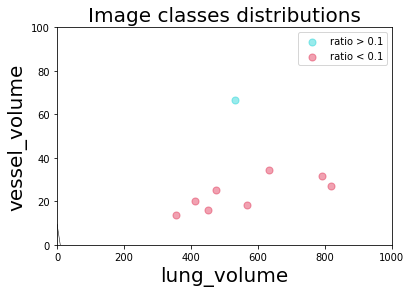

In [30]:
import numpy as np

plt.title('Image classes distributions', fontsize = 20)
plt.xlabel('lung_volume', fontsize = 20)
plt.ylabel('vessel_volume', fontsize = 20)
plt.xlim(xmax=1000,xmin=0)
plt.ylim(ymax=100,ymin=0)
colors1 = '#00CED1' 
colors2 = '#DC143C'
area = np.pi * 4**2  

plt.scatter(x1, y1, s=area, c=colors1, alpha=0.4, label='ratio > 0.1')
plt.scatter(x2, y2, s=area, c=colors2, alpha=0.4, label='ratio < 0.1')
plt.plot([0,9.5],[9.5,0],linewidth = '0.5',color='#000000')
plt.legend()
plt.show()